In [1]:
import sqlite3
import sqlalchemy as db
from sqlalchemy.orm import Session
import matplotlib as plt
from collections import Counter
import operator

import matplotlib.pyplot as plt

In [2]:
engine = db.create_engine('sqlite:///flights.sqlite3', echo=True)     #relative directory (in same folder as this notebook so no directory)
connection = engine.connect()
flights = db.Table('ontime', db.MetaData(), autoload=True, autoload_with=engine)
session = Session(bind=engine)
cols = flights.columns

2019-11-26 13:40:33,219 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-26 13:40:33,220 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 13:40:33,221 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-26 13:40:33,222 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 13:40:33,224 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("ontime")
2019-11-26 13:40:33,224 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 13:40:33,227 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'ontime' AND type = 'table'
2019-11-26 13:40:33,228 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 13:40:33,229 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("ontime")
2019-11-26 13:40:33,229 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 13:40:33,230 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SEL

In [3]:
cols.keys()

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [19]:
def intervals(timeDelay):
    ranges = {
        "Jan.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 1 ).all(),
        "Feb.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 2).all(),
        "Mar.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 3).all(),
        "Apr.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 4).all(),
        "May": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 5).all(),
        "June": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 6).all(),
        "July": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 7).all(),
        "Aug.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 8).all(),
        "Sept.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 9).all(),
        "Oct.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 10).all(),
        "Nov.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 11).all(),
        "Dec.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 12).all()
    }
    interval_totals = {}
    for key in ranges.keys():
        interval_totals[key] = len(ranges[key])
    return interval_totals

In [20]:
onehour = intervals(60)

2019-11-26 15:03:21,590 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
2019-11-26 15:03:21,594 INFO sqlalchemy.engine.base.Engine (60, 1)
2019-11-26 15:03:51,986 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
2019-11-26 15:03:51,986 INFO sqlalchemy.engine.base.Engine (60, 2)
2019-11-26 15:04:30,614 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
2019-11-26 15:04:30,614 INFO sqlalchemy.engine.base.Engine (60, 3)
2019-11-26 15:05:06,371 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
201

In [21]:
threehours = intervals(180)

2019-11-26 15:10:44,758 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
2019-11-26 15:10:44,760 INFO sqlalchemy.engine.base.Engine (180, 1)
2019-11-26 15:11:25,224 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
2019-11-26 15:11:25,225 INFO sqlalchemy.engine.base.Engine (180, 2)
2019-11-26 15:11:51,495 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
2019-11-26 15:11:51,496 INFO sqlalchemy.engine.base.Engine (180, 3)
2019-11-26 15:12:43,790 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?


In [14]:
fivehours = intervals(300)

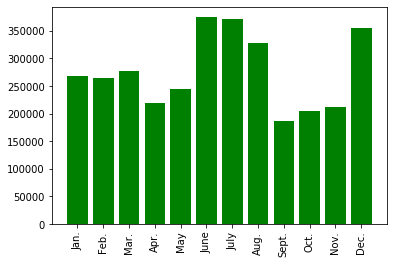

In [22]:
plt.bar(onehour.keys(), onehour.values(), width=0.8, color='g')
plt.xticks(range(len(onehour)), onehour.keys(), rotation=90)
plt.show()

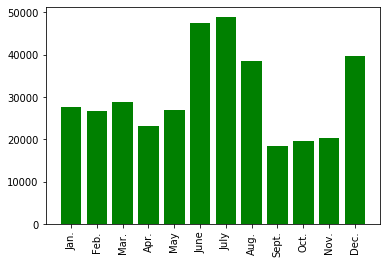

In [9]:
plt.bar(threehours.keys(), threehours.values(), width=0.8, color='g')
plt.xticks(range(len(threehours)), threehours.keys(), rotation=90)
plt.show()

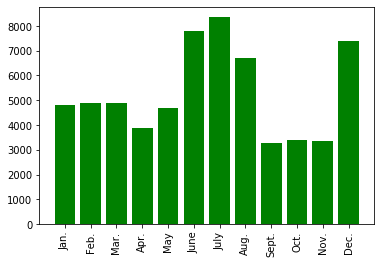

In [10]:
plt.bar(fivehours.keys(), fivehours.values(), width=0.8, color='g')
plt.xticks(range(len(fivehours)), fivehours.keys(), rotation=90)
plt.show()